In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import utils

In [2]:
data= pd.read_csv("Potato.csv")

In [3]:
data

,Year,District,Rainfall,MaxT,MinT,Humidity,Potato Area,Potato Production
0,2015,Chuadanga,27.0,30.50,16.45,72.5,3832,31962
1,2016,Chuadanga,61.0,31.60,18.25,73.5,3964,33803
2,2017,Chuadanga,4.5,23.70,16.45,70.0,4606,40510
3,2018,Chuadanga,2.0,31.75,17.05,70.0,4612,40490
4,2019,Chuadanga,47.5,30.25,15.80,71.5,4712,40660
5,2020,Chuadanga,21.5,30.22,15.70,72.5,4899,53271
6,2015,Jessore,59.0,31.10,16.95,69.5,7822,72745
7,2016,Jessore,40.5,32.40,19.30,71.0,7785,72024
8,2017,Jessore,12.0,24.15,16.95,69.5,7762,73332
9,2018,Jessore,7.0,32.40,17.95,69.5,8701,83615


In [4]:
data.describe()

,Year,Rainfall,MaxT,MinT,Humidity,Potato Area,Potato Production
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,3.600000e+01
mean,2017.500000,33.261111,29.715556,17.333056,71.625000,28407.833333,2.522680e+05
std,1.732051,29.245320,2.770287,1.465395,1.741818,71979.664695,6.106896e+05
min,2015.000000,0.000000,23.050000,15.340000,69.000000,1169.000000,7.230000e+03
25%,2016.000000,11.875000,29.907500,16.300000,70.375000,4585.000000,3.881825e+04
50%,2017.500000,25.250000,30.500000,17.000000,71.250000,5970.000000,5.238350e+04
75%,2019.000000,48.375000,31.525000,18.297500,72.625000,8291.250000,7.220425e+04
max,2020.000000,120.000000,32.400000,21.000000,76.500000,409183.000000,3.357975e+06


In [5]:
data.corr()

,Year,Rainfall,MaxT,MinT,Humidity,Potato Area,Potato Production
Year,1.000000,0.001410,-0.010242,-0.352058,-0.172835,0.040180,0.049347
Rainfall,0.001410,1.000000,0.190186,0.203742,0.461677,-0.186687,-0.183124
MaxT,-0.010242,0.190186,1.000000,0.265628,0.035023,0.040954,0.020510
MinT,-0.352058,0.203742,0.265628,1.000000,0.394425,-0.230547,-0.260909
Humidity,-0.172835,0.461677,0.035023,0.394425,1.000000,0.008531,0.021715
Potato Area,0.040180,-0.186687,0.040954,-0.230547,0.008531,1.000000,0.996300
Potato Production,0.049347,-0.183124,0.020510,-0.260909,0.021715,0.996300,1.000000


<AxesSubplot:>

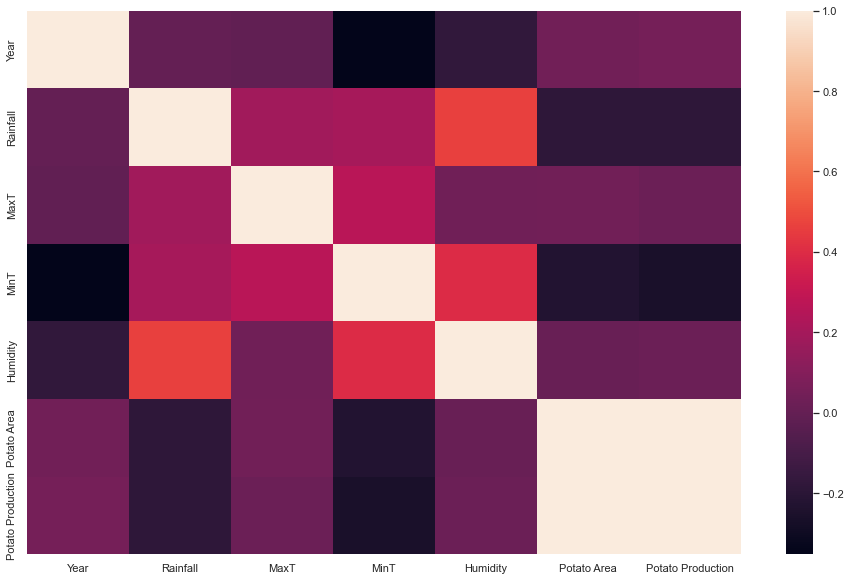

In [6]:
sns.set(rc={'figure.figsize':(16,10)})
sns.heatmap(data.corr())

In [7]:
model = data

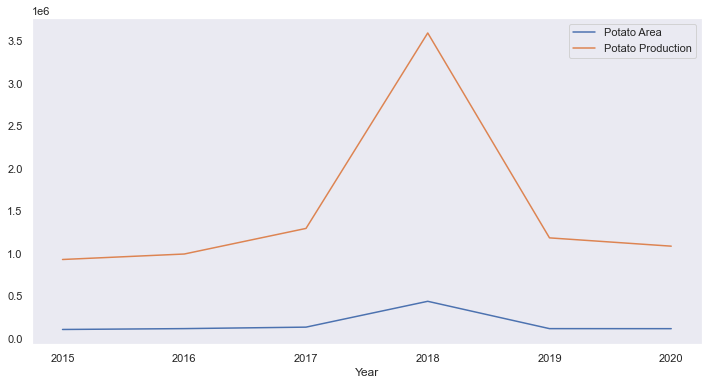

In [8]:
model.groupby("Year").sum()['Potato Area'].plot(figsize=(12,6));
model.groupby("Year").sum()['Potato Production'].plot(figsize=(12,6));
#model.groupby("Year").sum()['Aus Area'].plot(figsize=(12,6));
#model.groupby("Year").sum()['Aus Production'].plot(figsize=(12,6));

plt.legend()
plt.grid()

In [9]:
from sklearn import preprocessing
le = LabelEncoder()
data['District'] = le.fit_transform(data['District'])

In [10]:
data

,Year,District,Rainfall,MaxT,MinT,Humidity,Potato Area,Potato Production
0,2015,0,27.0,30.50,16.45,72.5,3832,31962
1,2016,0,61.0,31.60,18.25,73.5,3964,33803
2,2017,0,4.5,23.70,16.45,70.0,4606,40510
3,2018,0,2.0,31.75,17.05,70.0,4612,40490
4,2019,0,47.5,30.25,15.80,71.5,4712,40660
5,2020,0,21.5,30.22,15.70,72.5,4899,53271
6,2015,1,59.0,31.10,16.95,69.5,7822,72745
7,2016,1,40.5,32.40,19.30,71.0,7785,72024
8,2017,1,12.0,24.15,16.95,69.5,7762,73332
9,2018,1,7.0,32.40,17.95,69.5,8701,83615


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
names = data.columns

data = scaler.fit_transform(data)
data = pd.DataFrame(data,columns = names)

In [12]:
data

,Year,District,Rainfall,MaxT,MinT,Humidity,Potato Area,Potato Production
0,0.0,0.0,0.225000,0.796791,0.196113,0.466667,0.006527,0.007381
1,0.2,0.0,0.508333,0.914439,0.514134,0.600000,0.006850,0.007930
2,0.4,0.0,0.037500,0.069519,0.196113,0.133333,0.008424,0.009932
3,0.6,0.0,0.016667,0.930481,0.302120,0.133333,0.008438,0.009926
4,0.8,0.0,0.395833,0.770053,0.081272,0.333333,0.008684,0.009977
5,1.0,0.0,0.179167,0.766845,0.063604,0.466667,0.009142,0.013741
6,0.0,0.2,0.491667,0.860963,0.284452,0.066667,0.016306,0.019552
7,0.2,0.2,0.337500,1.000000,0.699647,0.266667,0.016215,0.019337
8,0.4,0.2,0.100000,0.117647,0.284452,0.066667,0.016159,0.019728
9,0.6,0.2,0.058333,1.000000,0.461131,0.066667,0.018460,0.022796


# SVM

In [13]:
X = data[['District','Rainfall','MaxT','MinT','Humidity','Potato Area']].values
y = data['Potato Production'].values

X_train = X[:25]
y_train = y[:25]

X_test = X[25:]
y_test = y[25:]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

Mean Absolute Error: 0.14479195494988784
Mean Squared Error: 0.06848385877371066
Root Mean Squared Error: 0.2616942085215312
Variance score: 0.31
R2 score : 0.31


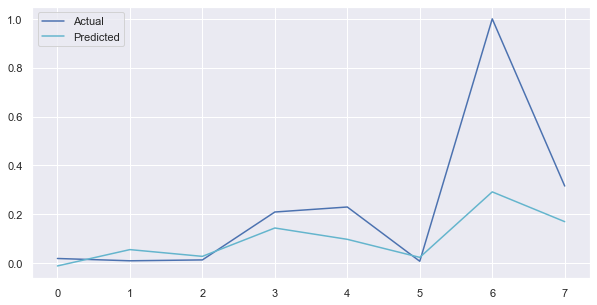

In [15]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
reg = svm.SVR(kernel='linear') # Linear Kernel

#Train the model using the training sets
reg.fit(X_train, y_train)

#Predict the response for test dataset
y_pred1 = reg.predict(X_test)

from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))


#Visualizing the results
plt.figure(figsize=(10,5))
#plt.title('Foreign Exchange Rate of %s by Lasso Regression')
plt.plot(y_test , label = 'Actual', color = 'b')
plt.plot(y_pred1 , label = 'Predicted', color = 'c')
plt.legend()
#plt.savefig("%s + Lasso.png"%var)

from sklearn.metrics import r2_score

print('Variance score: %.2f' % reg.score(X_test, y_test))
print("R2 score : %.2f" % r2_score(y_test,y_pred1))


In [16]:
y_test.shape

(8,)

In [17]:
df = pd.DataFrame({'Actual': y_test, 'Pred_SVM': y_pred1})
#df1 = df.head(20)

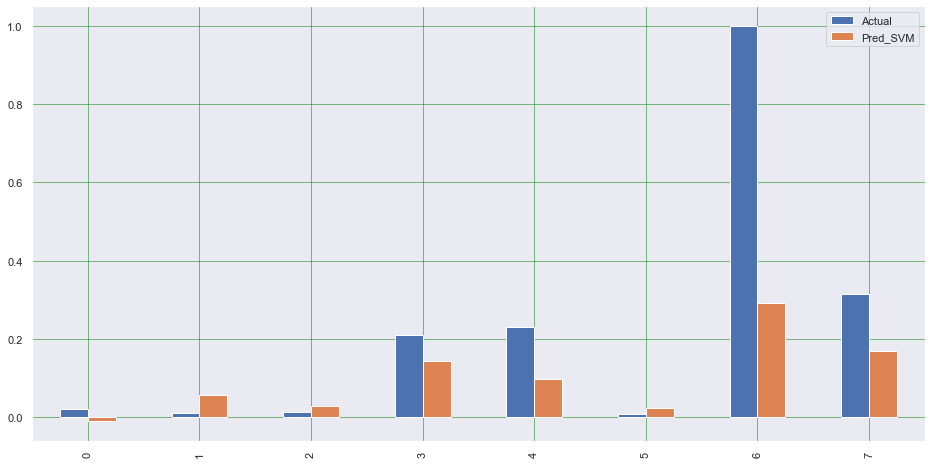

In [18]:
df.plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Random Forest

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=42, random_state=0)
regressor.fit(X_train, y_train)
y_pred3 = regressor.predict(X_test)

In [21]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print('Variance score: %.2f' % regressor.score(X_test, y_test))
print("R2 score : %.2f" % r2_score(y_test,y_pred3))

Mean Absolute Error: 0.15368194681509706
Mean Squared Error: 0.09930143578034904
Root Mean Squared Error: 0.31512130327914845
Variance score: -0.01
R2 score : -0.01


In [22]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred3})

In [23]:
df

,Actual,Predicted
0,0.019337,0.015377
1,0.009932,0.016383
2,0.013472,0.014784
3,0.209542,0.132198
4,0.230013,0.132781
5,0.007930,0.005993
6,1.000000,0.135265
7,0.315887,0.139403


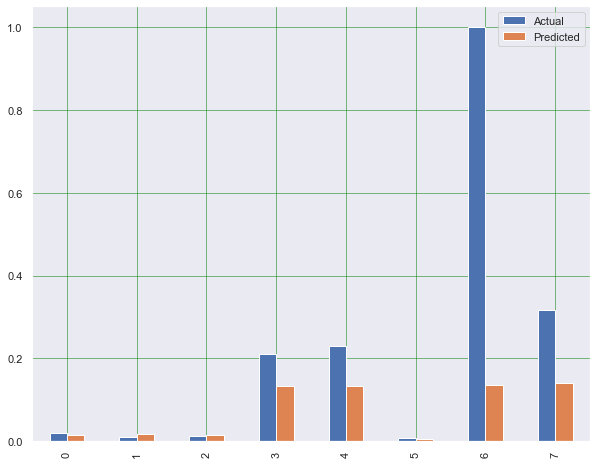

In [24]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

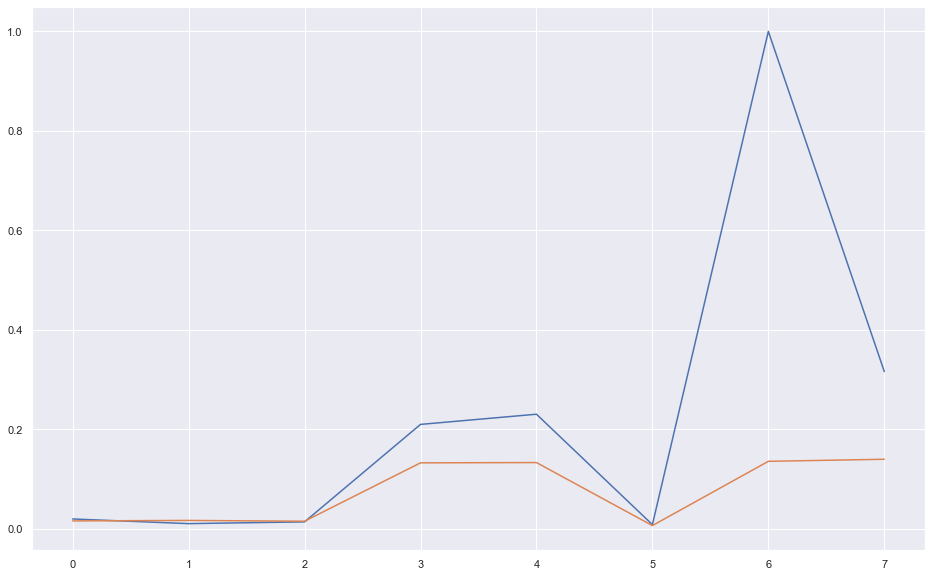

In [25]:
plt.plot(df)

### SVR-RF

In [26]:
# evaluate base models in isolation on the regression dataset
from numpy import hstack
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
 
# get the dataset
#def get_dataset():
#	X, y = make_regression(n_samples=10000, n_features=20, n_informative=10, noise=0.3, random_state=7)
#	return X, y
 
# get a list of base models
def get_models():
	models = list()
#	models.append(('lr', LinearRegression()))
#	models.append(('knn', KNeighborsRegressor()))
#	models.append(('cart', DecisionTreeRegressor()))
	models.append(('svm', SVR()))
#	models.append(('rd', Ridge(alpha = 0.1)))
	models.append(('rf', RandomForestRegressor(n_estimators=10, random_state=12)))
#	models.append(('ls', Lasso(alpha=0.01)))
	return models
 
# define dataset
#X, y = get_dataset()
# split dataset into train and test sets
#X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# summarize data split
#print('Train: %s, Test: %s' % (X_train_full.shape, X_test.shape))
# create the base models
models = get_models()
# evaluate standalone model
for name, model in models:
	# fit the model on the training dataset
	model.fit(X_train,y_train)
	# make a prediction on the test dataset
	y_pred5 = model.predict(X_test)
	# evaluate the predictions
#	score = mean_absolute_error(y_test, yhat)
	# report the score
#	print('>%s MAE: %.3f' % (name, score))

In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred5))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))
print('Variance score: %.2f' % model.score(X_test, y_test))
print("R2 score : %.2f" % r2_score(y_test,y_pred5))

Mean Absolute Error: 0.1752561258764842
Mean Squared Error: 0.11395162935332934
Root Mean Squared Error: 0.3375672219770891
Variance score: -0.15
R2 score : -0.15


#Visualizing the results
print(len(y_test))
xx = data["Year"]

xx= xx[82:]
plt.figure(figsize=(12,6))
plt.title("Crude Oil Price Prediction Using LKDSR")
plt.xlabel('Data Sample According to Time')
plt.ylabel('Crude Oil Price')

plt.plot(xx,y_test , label = 'Actual', color = 'r')
plt.plot(y_pred5 , label = 'Predicted', color = 'b')
plt.xticks(rotation=90)
plt.legend()
#plt.grid(color='k', linestyle='-', linewidth=1)
#plt.savefig("lkdsr.png")


In [28]:
#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred1})

import matplotlib.pyplot as plt
import seaborn as sns

xx = data["Year"]

xx= xx[78:]

print(len(xx))

sns.set_theme(style="darkgrid")

plt.figure(figsize=(12,6))
#sns.lineplot(data = df)
sns.lineplot(xx,y_pred1,label = 'Actual', color = 'r')
sns.lineplot(xx,y_test, label = 'Predicted', color = 'b')
plt.xticks(rotation=90)
plt.legend()
plt.show()


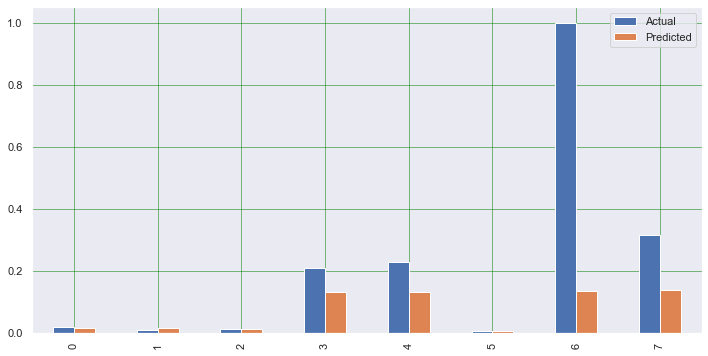

In [29]:
df.plot(kind='bar',figsize=(12,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [30]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Pred_SVR': y_pred1.flatten(),'Pred_RF': y_pred3.flatten(),'Pred_SVR-RF': y_pred5.flatten()})
df

,Actual,Pred_SVR,Pred_RF,Pred_SVR-RF
0,0.019337,-0.011190,0.015377,0.014537
1,0.009932,0.055687,0.016383,0.008953
2,0.013472,0.028010,0.014784,0.014230
3,0.209542,0.144140,0.132198,0.090539
4,0.230013,0.097750,0.132781,0.089273
5,0.007930,0.023893,0.005993,0.004892
6,1.000000,0.291946,0.135265,0.090072
7,0.315887,0.170053,0.139403,0.093086


In [31]:
#df.to_csv("Boro Result.csv")

No handles with labels found to put in legend.


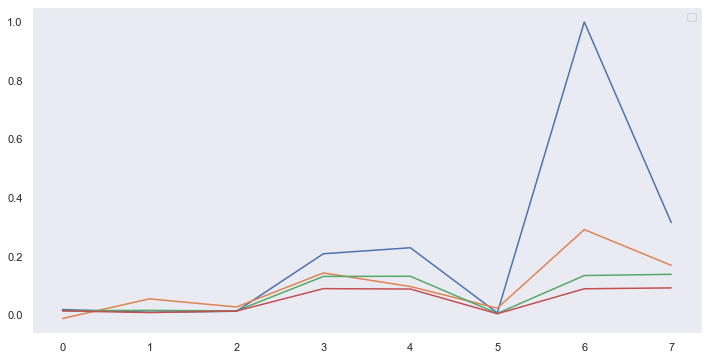

In [32]:
plt.figure(figsize=(12,6))
plt.plot(df)
plt.legend()
plt.grid()

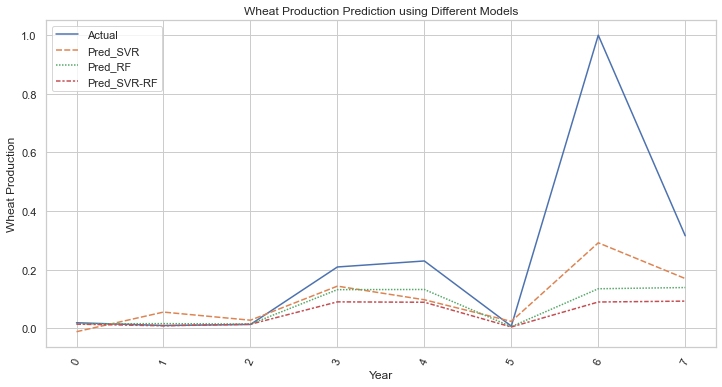

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")
#xx = data["Year"]  # year list

#xx= xx[82:]   # it is sub section of an array
#sns.lineplot(xx)
sns.lineplot(data = df)
plt.title("Wheat Production Prediction using Different Models")
plt.xticks(rotation=65)
plt.xlabel("Year")
plt.ylabel("Wheat Production")
#plt.grid()
#plt.savefig("Wheat_line.png")
plt.show()



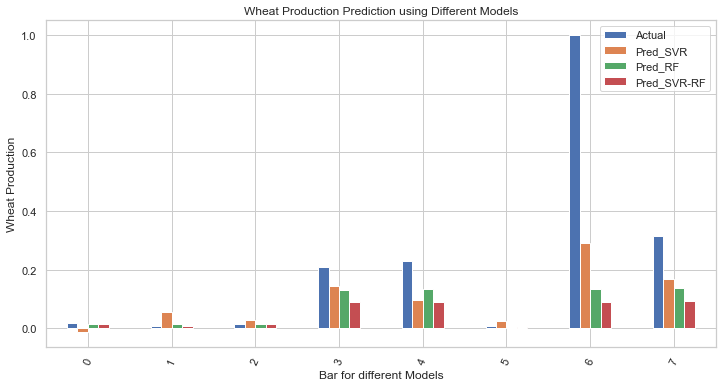

In [34]:
df.plot(kind='bar',figsize=(12,6))
plt.title("Wheat Production Prediction using Different Models")
plt.xlabel("Bar for different Models")
plt.ylabel("Wheat Production")
plt.xticks(rotation=65)
#plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
#plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig("Wheat_bar.png")
plt.show()
